In [2]:
#pip install psycopg2-binary

In [3]:
#Import the SQL database into Pandas.

from sqlalchemy import create_engine
from config import url
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



engine = create_engine(url)
connection = engine.connect()

In [4]:
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


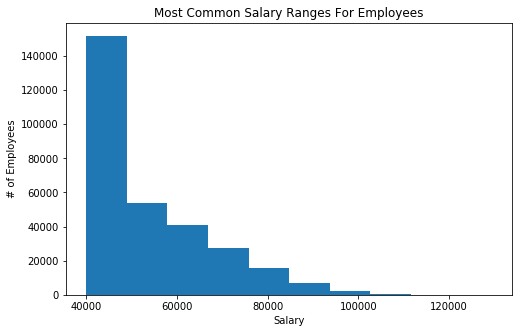

In [5]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.figure(figsize=(8,5))
salary = salaries["salary"]
plt.hist(salary, align='mid')
plt.title('Most Common Salary Ranges For Employees')
plt.xlabel('Salary')
plt.ylabel('# of Employees')
plt.savefig("../bonus images/common_salary.png")
plt.show()

In [6]:
titles = pd.read_sql("SELECT * FROM titles", connection)
titles

,title_id,titles
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
employees = pd.read_sql("SELECT * FROM employees", connection)
employees

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [8]:
emp_title = pd.merge(employees, titles, left_on='emp_title_id', right_on='title_id')
emp_title

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,titles
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,m0001,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,m0001,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,m0001,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,m0001,Manager


In [9]:
emp_complete = pd.merge(emp_title, salaries, on='emp_no')
emp_complete

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,titles,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016
...,...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,m0001,Manager,72446
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,m0001,Manager,71148
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,m0001,Manager,60026
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,m0001,Manager,40000


In [10]:
title_salary = emp_complete[["titles", "salary"]]
title_salary

,titles,salary
0,Staff,40000
1,Staff,40000
2,Staff,56087
3,Staff,87084
4,Staff,63016
...,...,...
300019,Manager,72446
300020,Manager,71148
300021,Manager,60026
300022,Manager,40000


In [11]:
avg_title_salary = title_salary.groupby(by='titles').mean()
avg_title_salary = avg_title_salary.reset_index()
avg_title_salary["salary"] = avg_title_salary["salary"].map('{:.2f}'.format)
avg_title_salary["salary"] = avg_title_salary["salary"].astype(float)
avg_title_salary

,titles,salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


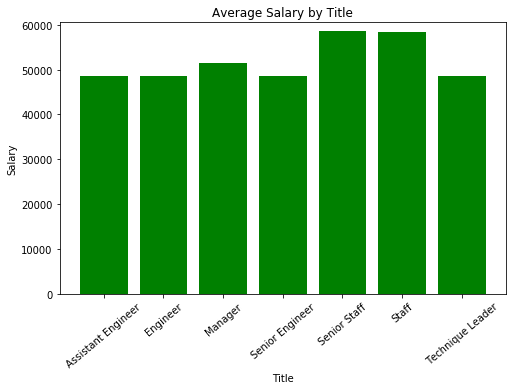

In [14]:
x_axis = np.arange(len(avg_title_salary))
plt.figure(figsize=(8,5))
plt.bar(x_axis, avg_title_salary["salary"], color='g', align='center')
plt.xticks(x_axis, avg_title_salary["titles"], rotation=40)
plt.ylim(0, max(avg_title_salary["salary"])+2000)
plt.title("Average Salary by Title")
plt.ylabel("Salary")
plt.xlabel("Title")
plt.savefig("../bonus images/avg_salary_by_title.png")
plt.show()
